# 1.First Example 
## 1.1 Loading the MNIST dataset in Keras

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 1.2 The network architecture

In [12]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
#The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#Preparing the labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_lalels = to_categorical(test_labels)

## 1.3 Training Networks

In [14]:
network.fit(train_images,train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3042 - acc: 0.9126
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2904 - acc: 0.9164
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2782 - acc: 0.9193
Epoch 4/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2673 - acc: 0.9228
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.2569 - acc: 0.9256


## 1.4 Evaluating 

In [16]:
test_loss, test_acc = network.evaluate(test_images,test_lalels)

10000/10000 [==============================] - 0s 29us/step


In [17]:
print('test_acc:',test_acc)

('test_acc:', 0.92920000000000003)


# 2. Binary Classification

In [2]:
from keras.datasets import imdb

#Loading the IMDB dataset
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [10]:
train_data.shape
# train_labels[0]

(25000,)

In [5]:
max([max(sequence) for sequence in train_data])

9999

Decoding the integer sequences back into sentences

In [4]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_review

u'? when the grinch came out i was excited though i thought it was going to be a happy go lucky film and it was though it did have a little nightmare before christmas touch to it you know kind of dark and spooky i loved this film because it helped fill people with the christmas spirit so mostly the grinch saved christmas and what happened then well in ? they say that the ? small heart grew three ? that day merry ?'

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.5098 - acc: 0.7977 - val_loss: 0.3843 - val_acc: 0.8736
Epoch 2/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.3056 - acc: 0.9025 - val_loss: 0.3024 - val_acc: 0.8912
Epoch 3/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2239 - acc: 0.9263 - val_loss: 0.2823 - val_acc: 0.8916
Epoch 4/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1782 - acc: 0.9417 - val_loss: 0.2743 - val_acc: 0.8935
Epoch 5/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1452 - acc: 0.9532 - val_loss: 0.2884 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1202 - acc: 0.9623 - val_loss: 0.2999 - val_acc: 0.8824
Epoch 7/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.0981 - acc: 0.9711 - val_loss: 0.3169 - val_acc

In [16]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

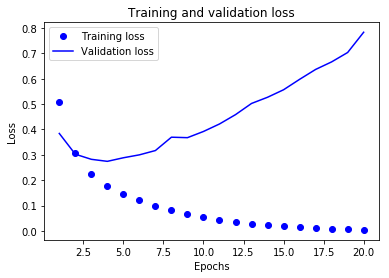

In [17]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


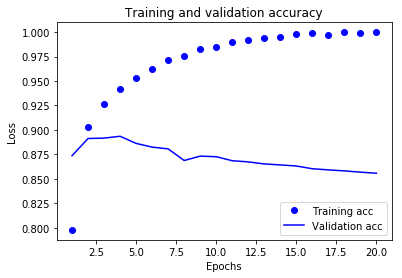

In [18]:
#Plotting the training and validation accuracy
plt.clf() # clear figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
#Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.4445 - acc: 0.8239
Epoch 2/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.2536 - acc: 0.9111
Epoch 3/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.1954 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 2s 63us/step


In [20]:
results

[0.31382537916183473, 0.87587999999999999]

In [23]:
#Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.4504 - acc: 0.8046
Epoch 2/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2478 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1890 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 2s 81us/step


In [29]:
#Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
    loss='mse',
    metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512,validation_data=(x_val, y_val))
# results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.1264 - acc: 0.8311 - val_loss: 0.0540 - val_acc: 0.9347
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.0543 - acc: 0.9324 - val_loss: 0.0348 - val_acc: 0.9629
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.0365 - acc: 0.9587 - val_loss: 0.0234 - val_acc: 0.9773
Epoch 4/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.0256 - acc: 0.9725 - val_loss: 0.0174 - val_acc: 0.9829


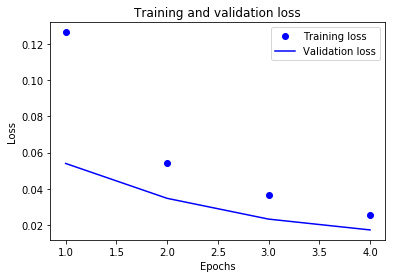

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3. Multi-class Classification

In [51]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [32]:
len(train_data)

8982

In [34]:
len(test_data)

2246

In [36]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 2s 4us/step


In [37]:
decoded_newswire

u'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [38]:
#Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [39]:
#One-hot encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [52]:
from keras import models
from keras import layers

#Model definition
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#Compiling our model
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

#Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#Training our model
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 137us/step - loss: 2.2237 - acc: 0.5337 - val_loss: 1.4795 - val_acc: 0.6690
Epoch 2/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.1762 - acc: 0.7509 - val_loss: 1.1377 - val_acc: 0.7660
Epoch 3/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.8280 - acc: 0.8284 - val_loss: 1.0085 - val_acc: 0.8010
Epoch 4/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.6068 - acc: 0.8780 - val_loss: 0.9780 - val_acc: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.4602 - acc: 0.9034 - val_loss: 0.8876 - val_acc: 0.8100
Epoch 6/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.3501 - acc: 0.9280 - val_loss: 0.8777 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.2820 - acc: 0.9357 - val_loss: 0.9044 - val_acc: 0.8120
Epoch 

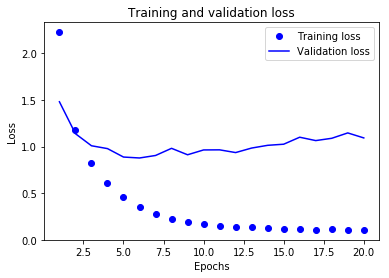

In [53]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

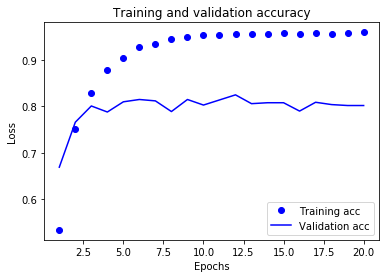

In [54]:
#Plotting the training and validation accuracy

plt.clf() # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [43]:
#Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(partial_x_train,
        partial_y_train,
        epochs=9,
        batch_size=512,
        validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 116us/step - loss: 2.5401 - acc: 0.5226 - val_loss: 1.6792 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 78us/step - loss: 1.3785 - acc: 0.7096 - val_loss: 1.2825 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 76us/step - loss: 1.0207 - acc: 0.7781 - val_loss: 1.1321 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.8003 - acc: 0.8257 - val_loss: 1.0532 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.6392 - acc: 0.8629 - val_loss: 0.9753 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.5112 - acc: 0.8930 - val_loss: 0.9097 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.4115 - acc: 0.9141 - val_loss: 0.8913 - val_acc: 0.8240
Epoch 8/9
798

In [44]:
results

[1.0225298075620766, 0.77738201251968353]

In [45]:
predictions = model.predict(x_test)

In [48]:
predictions[0].shape

(46,)

In [49]:
np.sum(predictions[0])

1.0000002

In [50]:
np.argmax(predictions[0])

3

# 4. Regression

In [55]:
#Loading the Boston housing dataset

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 6us/step


In [56]:
#Taking a look at the data
train_data.shape

(404, 13)

In [57]:
train_data[0]

array([   1.23247,    0.     ,    8.14   ,    0.     ,    0.538  ,
          6.142  ,   91.7    ,    3.9769 ,    4.     ,  307.     ,
         21.     ,  396.9    ,   18.72   ])

In [59]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [60]:
#Building network
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple time,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [61]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
                                    [train_targets[:i * num_val_samples],
                                    train_targets[(i + 1) * num_val_samples:]],
                                    axis=0)
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


In [62]:
all_scores

[2.1191272759201505, 2.2182126989459046, 2.8044591681792004, 2.309697482845571]

In [63]:
np.mean(all_scores)

2.3628741564727065

In [64]:
#Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
                                        [train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
                                        [train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],
                                        axis=0)
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


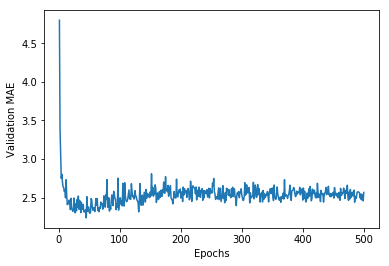

In [65]:
#Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [69]:
len(all_mae_histories)

4

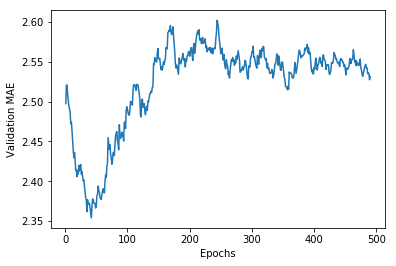

In [70]:
#Plotting validation scores - excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [74]:
## Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/step


In [76]:
test_mae_score

2.6553069750467935